<a href="https://colab.research.google.com/github/mauricionoris/25B3_ml/blob/master/colabs/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# KNN as Classifier

O que é o KNN?

KNN (K — Nearest Neighbors) é um dos muitos algoritmos (de aprendizagem supervisionada) usado no campo de data mining e machine learning, ele é um classificador onde o aprendizado é baseado “no quão similar” é um dado (um vetor) do outro. O treinamento é formado por vetores de n dimensões.

O KNN (K-nearest neighbors, ou “K-vizinhos mais próximos”) costuma ser um dos primeiros algoritmos aprendidos por iniciantes no mundo do aprendizado de máquina.

O KNN é muito utilizado em problemas de classificação, e felizmente é um dos algoritmos de machine learning mais fáceis de se compreender. Em resumo, o KNN tenta classificar cada amostra de um conjunto de dados avaliando sua distância em relação aos vizinhos mais próximos. Se os vizinhos mais próximos forem majoritariamente de uma classe, a amostra em questão será classificada nesta categoria. Para entender como o KNN funciona detalhadamente, primeiro considere que temos um conjunto de dados dividido em duas classes: azul e vermelho, conforme a figura abaixo.


<center><img src='https://didatica.tech/wp-content/uploads/2019/09/duas-classes.jpg' width=300></center>

Agora recebemos uma amostra que ainda não está classificada, e gostaríamos de definir se ela pertence à classe azul ou à classe vermelha. Digamos que essa nova amostra (cor verde na figura abaixo) esteja localizada nessa região:

<center><img src='https://didatica.tech/wp-content/uploads/2019/09/nova-amostra-para-classificar.jpg' width=300></center>

Intuitivamente, podemos observar que faz mais sentido classificar essa amostra como pertencendo à classe vermelha. Mas o algoritmo não possui “intuição”, ele precisa de um cálculo matemático para poder definir a solução.

No caso do KNN, a lógica é a seguinte: Observa-se a classe dos vizinhos mais próximos, em uma votação onde a maioria vence. Por exemplo, vamos supor que estamos analisando os 3 vizinhos mais próximos. Obs: **mais próximo significa com a menor distância em relação à amostra**:

<center><img src='https://didatica.tech/wp-content/uploads/2019/09/classificando-a-amostra.png' width=300></center>

Na figura acima, podemos ver que os 3 vizinhos mais próximos pertencem à classe vermelha. Então como houve 3 votos a zero para a classe vermelha, essa amostra fica sendo classificada nessa classe:

<center><img src='https://didatica.tech/wp-content/uploads/2019/09/classificacao-escolhida.jpg' width=300></center>

Obs: talvez agora esteja mais claro o significado do nome “KNN”, que refere-se a “k-vizinhos mais próximos”, onde k é um número que podemos determinar. Nesse exemplo, estamos usando k=3. Agora recebemos outra amostra que queremos classificar:

<center><img src='https://didatica.tech/wp-content/uploads/2019/09/proxima-amostra.jpg' width=300></center>

Utilizando o mesmo método KNN com k=3:

<center><img src='https://didatica.tech/wp-content/uploads/2019/09/k3.jpg' width=300></center>

Encontramos os 3 vizinhos mais próximos dessa amostra. Dessa vez, há duas amostras da classe vermelha e uma da classe azul. Como a votação ficou 2×1 para a classe vermelha, essa amostra ficaria sendo classificada nessa classe:

<center><img src='https://didatica.tech/wp-content/uploads/2019/09/classe-final-com-k3.jpg' width=300></center>

Essa metodologia poderia ser aplicada para qualquer nova amostra e estaríamos aptos a definir sua devida classificação. Porém até agora utilizamos apenas o exemplo de k=3. Na prática, podemos escolher outro valor de k. Vamos supor que a mesma amostra anterior estivesse sendo analisada com o algoritmo de KNN com k=5:

<center><img src='https://didatica.tech/wp-content/uploads/2019/09/knn-com-k5-300x292.jpg' width=300></center>

Dessa vez, dos 5 vizinhos mais próximos, 3 são azuis e 2 são vermelhos. Portanto a classe vencedora foi a azul. Essa amostra seria classificada nessa classe:

<center><img src='https://didatica.tech/wp-content/uploads/2019/09/classe-final-com-k5-300x292.jpg' width=300></center>

Nota-se que, dependendo do valor de k, poderemos ter resultados diferentes para cada situação.

Quando o k é pequeno, a classificação fica mais sensível a regiões bem próximas (podendo ocorrer o problema de *overfitting*). Com k grande, a classificação fica menos sujeita a ruídos pode ser considerada mais robusta, porém se k for grande demais, pode ser que haja o problema de *underfitting*.

Obs: nos exemplos acima tentamos mostrar visualmente quais eram os vizinhos mais próximos em cada situação. Porém não podemos esquecer que a forma como o algoritmo faz essa seleção é *calculando a distância de cada um dos pontos já classificados em relação à nova amostra que queremos classificar*. Ou seja, como nos exemplos havia cerca de 30 amostras já classificadas, o algoritmo KNN teria que fazer o cálculo da distância de cada um desses pontos em relação à nova amostra, e ordenar depois do menor ao maior, selecionando assim as amostras mais próximas.

##Resumo do processo realizado pelo algoritmo KNN:
1 ) Receba um dado não classificado e meça distância do novo dado em relação a cada um dos outros dados que já estão classificados;

2 ) Selecione as K menores distâncias;

3 ) Verifique a(s) classe(s) dos dados que tiveram as K menores distâncias e contabilize a quantidade de vezes que cada classe que apareceu;

4 )  Classifique esse novo dado como pertencente à classe que mais apareceu.

In [ ]:
# First, start with importing necessary python packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [ ]:
# Next, download the iris dataset as follows
iris = datasets.load_iris()
#print(iris.data[0])
X = iris.data
y = iris.target

In machine learning, **data** is usually denoted with a capital  **X**, while **labels** are denoted by a lowercase  **y**. This is inspired by the standard formulation  `f(x)=y`  in mathematics, where  *x* is the input to a function and  *y* is the output. Following more conventions from mathematics, we use a capital  *X* because the data is a two-dimensional array (a matrix) and a lowercase y because the target is a one-dimensional array (a vector).

In [ ]:
print("Keys of iris dataset: \n{}".format(iris.keys()))

Keys of iris dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Now, we need to read dataset to pandas dataframe

In [ ]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris['target']
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


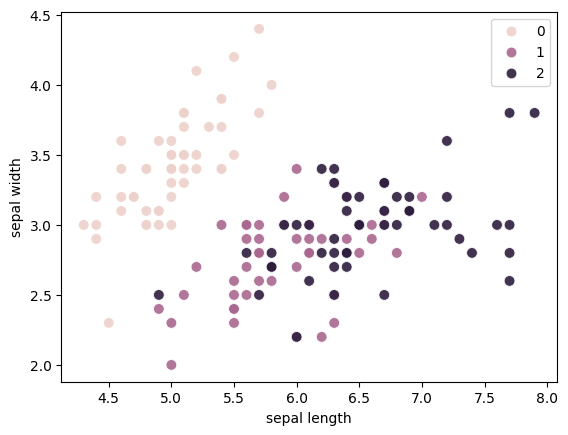

In [ ]:
# sepal length X sepal width plotting (two columm dataset plotting)
import seaborn as sns
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=60, alpha=.9)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

In [ ]:
iris_target = dict(enumerate(iris['target_names']))
iris_target

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

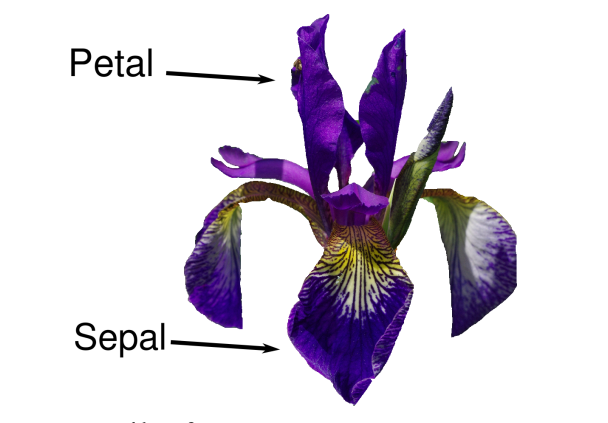

Como temos medições para as quais sabemos a espécie correta da íris, este é um problema de **aprendizado supervisionado**. Nesse caso, queremos prever uma entre várias opções (a espécie da íris). Este é um exemplo de **problema de classificação**. As possíveis saídas (as diferentes espécies de íris) são chamadas de **classes**. Cada íris no conjunto de dados pertence a uma das três classes, então este é um problema de **classificação com três classes**.

A saída desejada para um único ponto de dado (uma íris) é a **espécie dessa flor**. Para um ponto de dado específico, a espécie à qual ele pertence é chamada de **rótulo** (*label*).


In [ ]:
df.shape

(150, 5)

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Antes de tudo: Olhe para os seus dados

Antes de construir um modelo de aprendizado de máquina, geralmente é uma boa ideia inspecionar os dados, para ver se a tarefa é facilmente solucionável sem aprendizado de máquina ou se as informações desejadas podem não estar contidas nos dados.

Além disso, inspecionar seus dados é uma boa maneira de encontrar anormalidades e peculiaridades. Talvez algumas de suas íris tenham sido medidas usando polegadas e não centímetros, por exemplo. No mundo real, inconsistências nos dados e medições inesperadas são muito comuns.

Uma das melhores maneiras de inspecionar dados é visualizá-los. Uma maneira de fazer isso é usando um gráfico de dispersão. Um gráfico de dispersão dos dados coloca um recurso ao longo do eixo x e outro ao longo do eixo y e desenha um ponto para cada ponto de dados. Infelizmente, as telas de computador têm apenas duas dimensões, o que nos permite plotar apenas dois (ou talvez três) recursos por vez. É difícil plotar conjuntos de dados com mais de três recursos dessa maneira. Uma maneira de contornar esse problema é fazer um gráfico de pares, que analisa todos os pares possíveis de recursos. Se você tiver um pequeno número de recursos, como os quatro que temos aqui, isso é bastante razoável. Você deve ter em mente, no entanto, que um gráfico de pares não mostra a interação de todos os recursos de uma vez, então alguns aspectos interessantes dos dados podem não ser revelados ao visualizá-los dessa forma.

A figura descreve um gráfico de pares dos recursos no conjunto de dados. Os pontos de dados são coloridos de acordo com a espécie à qual a íris pertence. Para criar o gráfico, primeiro convertemos o array NumPy em um DataFrame pandas. pandas tem uma função para criar gráficos de pares chamada scatter_matrix. A diagonal desta matriz é preenchida com histogramas de cada recurso.

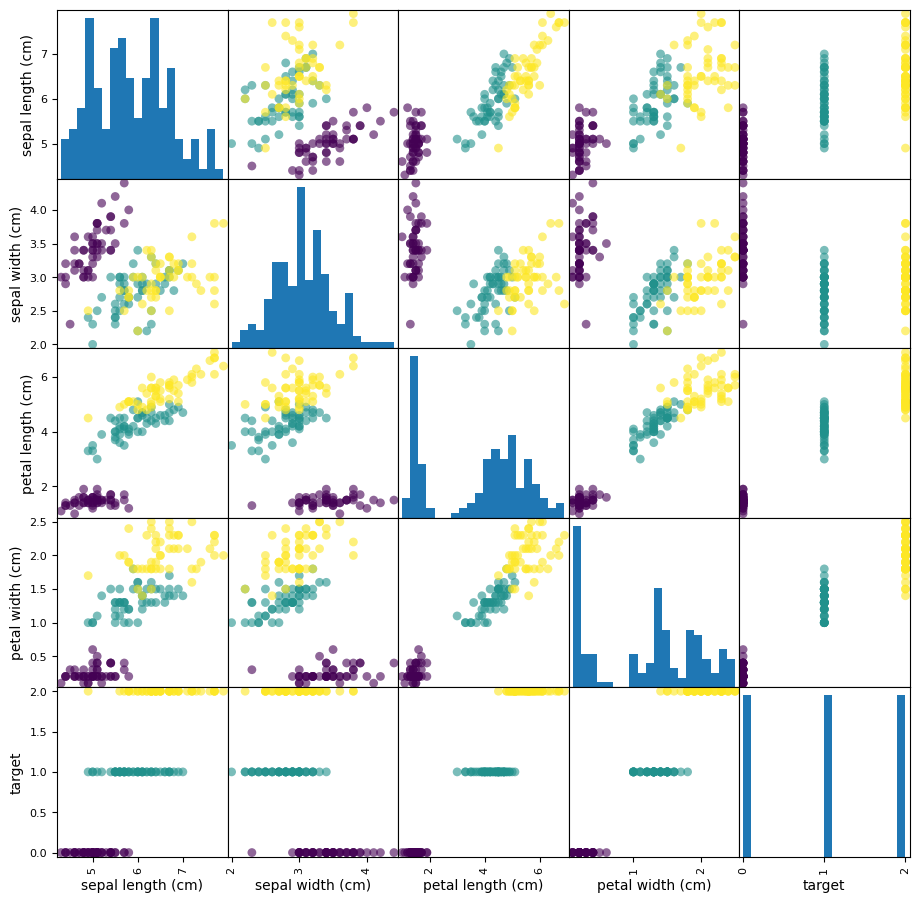

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, c=y, alpha=0.6, figsize=(11, 11), marker='o', hist_kwds={'bins': 20}, s=40)
plt.show()

Em seguida, dividiremos os dados em divisão de treinamento e teste. O código a seguir dividirá o conjunto de dados em 70% de dados de treinamento e 30% de dados de teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Antes de fazer a divisão, a função train_test_split embaralha o conjunto de dados usando um gerador de números pseudoaleatórios. Se pegássemos apenas os últimos 30% dos dados como um conjunto de teste, todos os pontos de dados teriam o rótulo 2, pois os pontos de dados são classificados pelo rótulo (veja a saída para `iris['target']` mostrada anteriormente). Usar um conjunto de teste contendo apenas uma das três classes não nos diria muito sobre o quão bem nosso modelo generaliza,
então embaralhamos nossos dados para garantir que os dados de teste contenham dados de todas as classes.

Para garantir que obteremos a mesma saída se executarmos a mesma função várias vezes, fornecemos ao gerador de números pseudoaleatórios uma semente fixa usando o parâmetro random_state. Isso tornará o resultado determinístico, então esta linha sempre terá o mesmo resultado. Sempre corrigiremos o `random_state` dessa forma ao usar procedimentos randomizados.

A saída da função train_test_split é *X_train*, *X_test*, *y_train* e *y_test*, que são todos arrays NumPy. X_train contém 70% das linhas do conjunto de dados, e *X_test* contém os 30% restantes.

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (105, 4)
y_train shape: (105,)
X_test shape: (45, 4)
y_test shape: (45,)


Em seguida, o dimensionamento dos dados será feito da seguinte forma

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Antes da padronização:

In [ ]:
X_train[0:10]

array([[5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8]])

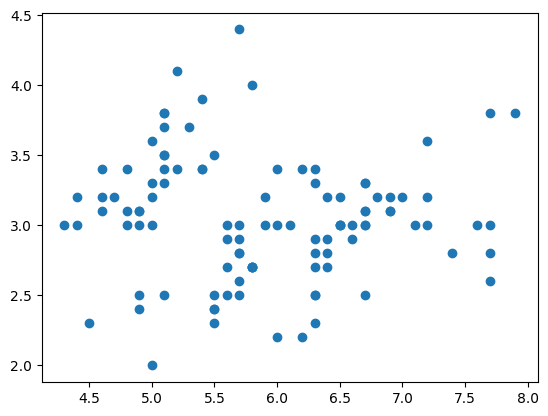

In [ ]:
# plot frist columm of dataset
plt.plot(X_train[:,0], X_train[:,1], 'o')
plt.show()

Após a padronização

In [ ]:
X_train_std[0:10]

array([[-1.02366372, -2.37846268, -0.18295039, -0.29318114],
       [ 0.69517462, -0.10190314,  0.93066067,  0.7372463 ],
       [ 0.92435306,  0.58106472,  1.04202177,  1.63887031],
       [ 0.1222285 , -1.92315077,  0.6522579 ,  0.35083601],
       [ 0.92435306, -1.24018291,  1.09770233,  0.7372463 ],
       [-0.33612839, -1.24018291,  0.03977182, -0.16437771],
       [ 2.07024529, -0.10190314,  1.26474398,  1.38126345],
       [ 0.46599617,  0.58106472,  0.48521625,  0.47963944],
       [-0.45071761, -1.46783886, -0.01590873, -0.16437771],
       [ 0.46599617, -0.784871  ,  0.59657735,  0.7372463 ]])

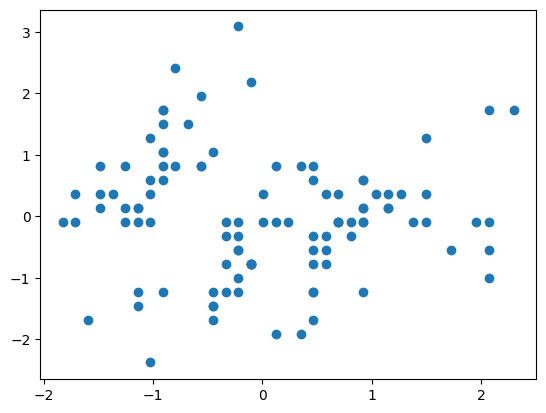

In [ ]:
plt.plot(X_train_std[:,0], X_train_std[:,1], 'o')
plt.show()

Em seguida, treine o modelo com a ajuda da classe KNeighborsClassifier do sklearn

# Construindo seu primeiro modelo: k-vizinhos mais próximos
Agora podemos começar a construir o modelo de aprendizado de máquina real. Existem muitos algoritmos de classificação no `scikit-learn` que poderíamos usar. Aqui usaremos um classificador k-neighbors
neighbors, que é fácil de entender. Construir este modelo consiste apenas em
armazenar o conjunto de treinamento. Para fazer uma previsão para um novo ponto de dados, o algoritmo
encontra o ponto no conjunto de treinamento que está mais próximo do novo ponto. Então, ele atribui o
rótulo deste ponto de treinamento ao novo ponto de dados.

O *k* em *k-vizinhos mais próximos* significa que, em vez de usar apenas o vizinho mais próximo do novo ponto de dados, podemos considerar qualquer número fixo k de vizinhos no treinamento (por exemplo, os três ou cinco vizinhos mais próximos). Então, podemos fazer uma previsão usando a classe majoritária entre esses vizinhos.

Todos os modelos de aprendizado de máquina em `scikit-learn` são implementados em suas próprias classes, que são chamadas Estimatorclasses. O algoritmo de classificação *k-nearest neighbors* é implementado na classe KNeighborsClassifier no módulo neighbors. Antes
de podermos usar o modelo, precisamos instanciar a classe em um objeto. É quando definiremos quaisquer parâmetros do modelo. O parâmetro mais importante de `KNeighborsClassifier` é o número de vizinhos, que definiremos como 5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train);

# Avaliando o modelo
É aqui que entra o conjunto de teste que criamos anteriormente. Esses dados não foram usados ​​para
construir o modelo, mas sabemos qual é a espécie correta para cada íris no conjunto de
teste.
Portanto, podemos fazer uma previsão para cada íris nos dados de teste e compará-la
com seu rótulo (a espécie conhecida). Podemos medir o quão bem o modelo funciona
calculando a *precisão*, que é a fração de flores para as quais a espécie correta
foi prevista.

In [ ]:
y_pred = knn.predict(X_test_std)
print("Test set predictions:\n{}".format(y_pred))

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


Em seguida, imprima os resultados e as métricas

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Last one the accuracy of predictions

In [ ]:
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Accuracy: 0.9777777777777777


Outra maneira de calcular a precisão:

In [ ]:
print("Test set score: {:.3f}".format(np.mean(y_pred == y_test)))

Test set score: 0.978


In [ ]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True])

Para este modelo, a precisão do conjunto de teste é de cerca de 0,97, o que significa que fizemos a previsão correta
para 97% das íris no conjunto de teste. Sob algumas suposições matemáticas, isso significa que podemos esperar que nosso modelo esteja correto 97% das vezes para novas
íris. Para nossa aplicação de botânico amador, esse alto nível de precisão significa que nosso
modelo pode ser confiável o suficiente para ser usado.

# Fazendo previsões
Agora podemos fazer previsões usando este modelo em novos dados para os quais podemos não
conhecer os rótulos corretos. Imagine que encontramos uma íris na natureza com um comprimento de sépala de
6 cm, uma largura de sépala de 3 cm, um comprimento de pétala de 5 cm e uma largura de pétala de 2 cm.
Que espécie de íris seria essa? Podemos colocar esses dados em uma matriz NumPy, novamente
calculando a forma — isto é, o número de amostras (1) multiplicado pelo número de
características (4):

In [ ]:
X_new = np.array([[6, 3, 5, 2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [ ]:
X_new_std = sc.transform(X_new)
X_new_std


array([[ 0.1222285 , -0.10190314,  0.6522579 ,  0.99485316]])

In [ ]:
# Make prediction of new sample
prediction = knn.predict(X_new_std)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris['target_names'][prediction]))

Prediction: [2]
Predicted target name: ['virginica']


# Exercícios
1.  Mudar o parâmetro `n_neighbors`  na função `KNeighborsClassifier` para 1, 3, 5 e 7 e comentar os resultados.

1. Modificar a porcentagem do banco de dados para treinamento/teste nas proporções: 30% para treinamento, 50% para treinamento e 90% para treinamento. Comparar a acurácia e os dados da matriz de confusão com os resultados anteriores (70% treinamento). Criar uma tabela para visualizar essa comparação.

1. Criar uma nova entrada de dados com 3 valores próximos aos dos 3 tipos de classes e fazer a predição de cada conjunto de dados. Plotar esses dados e verificar se foram preditos corretamente.

1.  O que significa a matriz de confusão? Fazer uma análise dos resultados

1.  O que significam os dados no *Classification Report*

1.  O que significa a acurácia (*accuracy*)?





#Referências

[1] https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

[2] https://medium.com/brasil-ai/knn-k-nearest-neighbors-1-e140c82e9c4e

[3] https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

[4] https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

[5] https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-knn/